In [63]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [17]:
def calculate_average_day(df, year, month):
    """
    Calculate the average day for a given year and month.
    
    Parameters:
    - df: DataFrame with a DatetimeIndex at hourly resolution
    - year: int, the year to filter (e.g., 2015)
    - month: int, the month to filter (1-12)
    
    Returns:
    - DataFrame representing an average day (0-23 hours)
    """
    df.index = pd.to_datetime(df.index)
    filtered_df = df[(df.index.year == year) & (df.index.month == month)]

    numeric_cols = filtered_df.select_dtypes(include=['number']).columns
    filtered_df = filtered_df[numeric_cols]

    avg_day = filtered_df.groupby(filtered_df.index.hour).mean()

    avg_day.index.name = "Hour"

    return avg_day

In [9]:
load_data = pd.read_csv("../data/actual-load-data/finland/ACTUAL_TOTAL_LOAD_201501010000-202501010000.csv", index_col=0)
print(load_data)

                                           StartTime            EndTime  \
Datetime                                                                  
2014-12-31 23:00:00+00:00  2014-12-31 23:00:00+00:00  2015-01-01T23:00Z   
2015-01-01 00:00:00+00:00  2014-12-31 23:00:00+00:00  2015-01-01T23:00Z   
2015-01-01 01:00:00+00:00  2014-12-31 23:00:00+00:00  2015-01-01T23:00Z   
2015-01-01 02:00:00+00:00  2014-12-31 23:00:00+00:00  2015-01-01T23:00Z   
2015-01-01 03:00:00+00:00  2014-12-31 23:00:00+00:00  2015-01-01T23:00Z   
...                                              ...                ...   
2025-01-03 03:00:00+00:00  2024-12-30 23:00:00+00:00  2024-12-31T23:00Z   
2025-01-03 07:00:00+00:00  2024-12-30 23:00:00+00:00  2024-12-31T23:00Z   
2025-01-03 11:00:00+00:00  2024-12-30 23:00:00+00:00  2024-12-31T23:00Z   
2025-01-03 15:00:00+00:00  2024-12-30 23:00:00+00:00  2024-12-31T23:00Z   
2025-01-03 19:00:00+00:00  2024-12-30 23:00:00+00:00  2024-12-31T23:00Z   

                        

In [8]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

production_data = pd.DataFrame()
for month in months:
    data = pd.read_csv(f"../data/production-results/2024-08-12_TMY_simulations/Turku/2024-08-12_turku_{month}_tmy_ac_production_profile.csv", index_col=0)
    production_data = pd.concat([production_data, data])

print(production_data)

                           AC Power (W)
Time                                   
2006-01-01 00:00:00+03:00        -0.075
2006-01-01 01:00:00+03:00        -0.075
2006-01-01 02:00:00+03:00        -0.075
2006-01-01 03:00:00+03:00        -0.075
2006-01-01 04:00:00+03:00        -0.075
...                                 ...
2015-12-31 19:00:00+03:00        -0.075
2015-12-31 20:00:00+03:00        -0.075
2015-12-31 21:00:00+03:00        -0.075
2015-12-31 22:00:00+03:00        -0.075
2015-12-31 23:00:00+03:00        -0.075

[8757 rows x 1 columns]


In [65]:
average_day_production = calculate_average_day(production_data, 2020, 7)
average_day_load = calculate_average_day(load_data, 2020, 7)

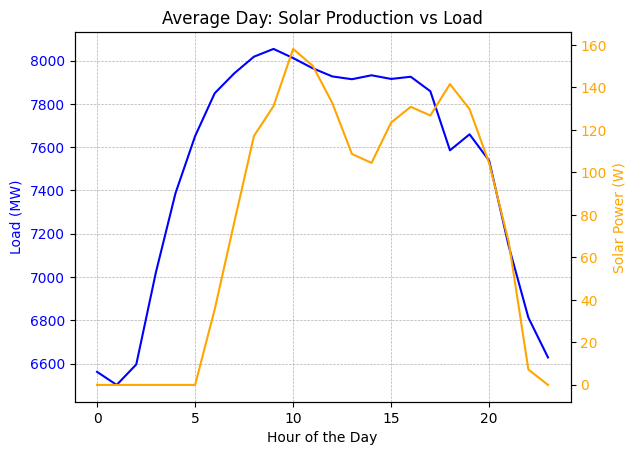

In [66]:
fig, ax1 = plt.subplots()

ax1.plot(average_day_load.index, average_day_load['Quantity'], label="Load", color='blue')
ax1.set_ylabel("Load (MW)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Solar Production on secondary y-axis (right)
ax2.plot(average_day_production.index, average_day_production['AC Power (W)'], label="Solar Production", color='orange')
ax2.set_ylabel("Solar Power (W)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Labels and Title
ax1.set_xlabel("Hour of the Day")
plt.title("Average Day: Solar Production vs Load")

# Show grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.show()

In [62]:
# Normalize the data (to remove scale effects)
solar_norm = average_day_production['AC Power (W)'] / np.linalg.norm(average_day_production['AC Power (W)'])
load_norm = average_day_load['Quantity'] / np.linalg.norm(average_day_load['Quantity'])

# Compute cosine similarity
similarity = cosine_similarity([solar_norm], [load_norm])[0][0]
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.823596931009162
